# Project: Explore Movie Dataset


## Introduction

> This dataset contains information of 10,866 movie titles released between 1960-2015. There are useful data which we can make use of in our analysis: popularity, original_title, cast, director, runtime, genres, release_date, vote_count, vote_average, budget_adj, and revenue_adj. Note that the budget_adj and revenue_adj are adjusted for inflation.

>Questions that will be answered from this analysis are:
<li>Is there a correlation between popularity and vote_average?</li>
<li>Is there a correlation between popularity and revenue_adj?</li>
<li>Is there a correlation between popularity and budget_adj?</li>
<li>Is there a correlation between revenue_adj and budget_adj?</li>
<li>Is there a correlation between revenue_adj and vote_average?</li>
<li>Is there a correlation between budget_adj and vote_average?</li>
<li>Do vote_average, budget_adj, and revenue_adj increase over time?</li>
<li>Which month of the year has highest average revenue_adj, budget_adj and vote_average?</li>
<li>Which director has the highest average revenue and average vote_average?</li>
<li>Which actor/actress has the highest average revenue and average vote_average?</li>
<li>Which genre has the highest average revenue and average vote_average?</li>

In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set_style('darkgrid')

## Data Wrangling

In [395]:
# Load data and print out a few lines to see what they look like.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [396]:
# See the columns, their data types, and their missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [397]:
# See the center and spread of quantitative data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning

In [398]:
# Drop columns that will note be used in the analysis.
df.drop(['imdb_id','budget','revenue','homepage','tagline','keywords','overview','runtime','production_companies'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id                10866 non-null int64
popularity        10866 non-null float64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1018.8+ KB


__Note: There are still some null values in cast, director, and genres columns, but we will keep this for analysis question 1) - 8). Before the analysis of question 9)-1)), we will remove the rows with null values.__

## Exploratory Data Analysis

### 1) Is there a correlation between popularity and vote_average? 

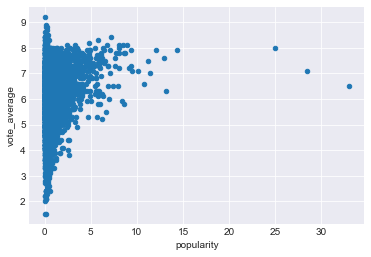

In [399]:
df.plot(x='popularity',y='vote_average',kind='scatter');

In [400]:
df['popularity'].corr(df['vote_average'])

0.20951130747540375

__There is a weak positive correlation between popularity and vote_average.__

### 2) Is there a correlation between popularity and revenue_adj?

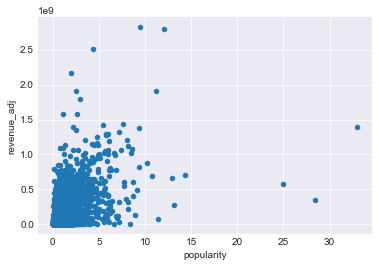

In [401]:
df.plot(x='popularity',y='revenue_adj',kind='scatter');

In [402]:
df['popularity'].corr(df['revenue_adj'])

0.6090834322818585

__There is a moderately strong positive correlation between popularity and revenue_adj.__

### 3) Is there a correlation between popularity and budget_adj?

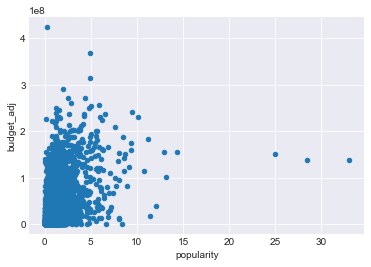

In [403]:
df.plot(x='popularity',y='budget_adj',kind='scatter');

In [404]:
df['popularity'].corr(df['budget_adj'])

0.5135500290096378

__There is a moderate positive correlation between popularity and budget_adj.__

### 4) Is there a correlation between revenue_adj and budget_adj?

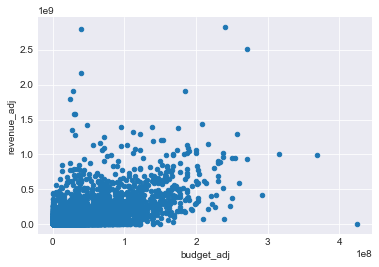

In [405]:
df.plot(x='budget_adj',y='revenue_adj',kind='scatter');

In [406]:
df['budget_adj'].corr(df['revenue_adj'])

0.6466074410608971

__There is a moderately strong positive correlation between budget_adj and revenue_adj.__

### 5) Is there a correlation between revenue_adj and vote_average?

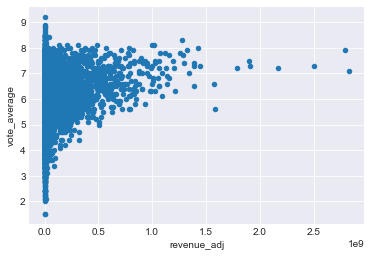

In [407]:
df.plot(x='revenue_adj',y='vote_average',kind='scatter');

In [408]:
df['vote_average'].corr(df['revenue_adj'])

0.1930850948330119

__There is a weak positive correlation between vote_average and revenue_adj.__

### 6) Is there a correlation between budget_adj and vote_average?

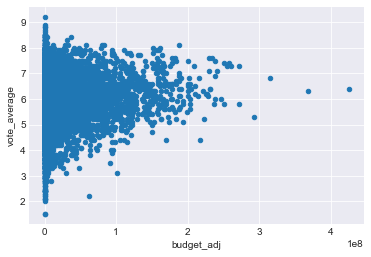

In [409]:
df.plot(x='budget_adj',y='vote_average',kind='scatter');

In [410]:
df['budget_adj'].corr(df['vote_average'])

0.0930389817834479

__There is a weak positive correlation between budget_adj and vote_average.__

### 7) Do vote_average, budget_adj, and revenue_adj increase over time?

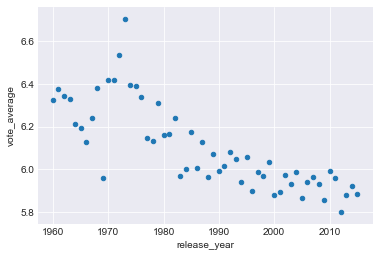

In [411]:
df_year = df.groupby(['release_year'],as_index=False).mean()
df_year.plot(x='release_year',y='vote_average',kind='scatter')

__vote_average decreases over time from 6.4 to 5.9.__

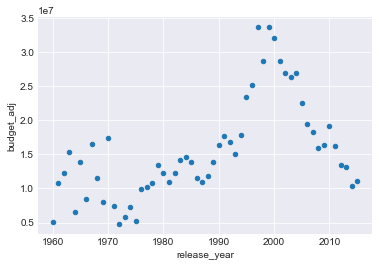

In [412]:
df_year = df.groupby(['release_year'],as_index=False).mean()
df_year.plot(x='release_year',y='budget_adj',kind='scatter')

__There is a significant spike in average movie budget_adj during 1997-2000.__

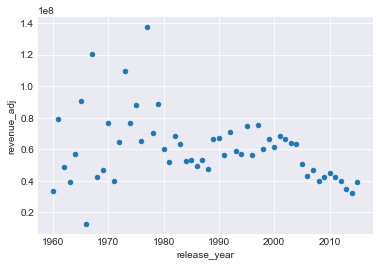

In [413]:
df_year = df.groupby(['release_year'],as_index=False).mean()
df_year.plot(x='release_year',y='revenue_adj',kind='scatter')

__Movie revenue_adj decreases over time.__

### 8) Which month of the year has highest average revenue_adj, budget_adj and vote_average (seasonality effects)?

In [414]:
# Extract month from release date and put it in a new column called 'release_month'
df['release_month'] = df['release_date'].apply(lambda x: int(x.split("/")[0]))

#Create a new dataframe to contain the means of columns, grouping by month.
df_month = df.groupby(['release_month'],as_index=False).mean()

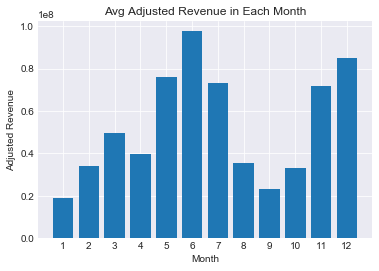

In [415]:
plt.bar(df_month['release_month'], df_month['revenue_adj'], tick_label = df_month['release_month'])
plt.title('Avg Adjusted Revenue in Each Month')
plt.xlabel('Month')
plt.ylabel('Adjusted Revenue');

__Movies released in May-Jul and Nov-Dec significanly have higher revenues.__

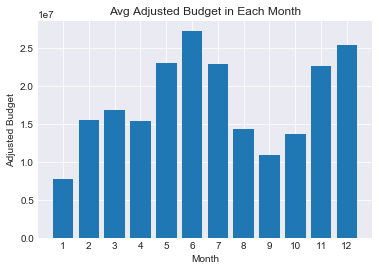

In [416]:
plt.bar(df_month['release_month'], df_month['budget_adj'], tick_label = df_month['release_month'])
plt.title('Avg Adjusted Budget in Each Month')
plt.xlabel('Month')
plt.ylabel('Adjusted Budget');

__Movies released in May-Jul and Nov-Dec significanly have higher budgets.__

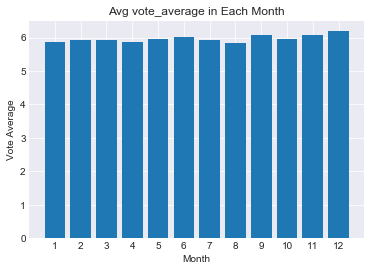

In [417]:
plt.bar(df_month['release_month'], df_month['vote_average'], tick_label = df_month['release_month'])
plt.title('Avg vote_average in Each Month')
plt.xlabel('Month')
plt.ylabel('Vote Average');

__No significant difference for vote_average in each month.__

### 9) Which director has the highest average revenue and average vote_average?

__Need to further clean data before continuing the analysis in 9) - 11).__

In [418]:
#drop any rows with null values.
df.dropna(inplace = True)

In [419]:
#reorder df index
df.index = np.arange(0,df.shape[0])

In [420]:
#add columns director_counts, cast_counts, genre_counts
df['director_counts'] = df['director'].apply(lambda x:x.count('|')+1)
df['cast_counts'] = df['cast'].apply(lambda x:x.count('|')+1)
df['genre_counts'] = df['genres'].apply(lambda x:x.count('|')+1)

In [421]:
subcolumns = ['id', 'original_title', 'director', 'vote_average', 'budget_adj', 'revenue_adj']
df_director = pd.DataFrame(columns=subcolumns)
ind = 0
for x in np.arange(0,df.shape[0]):
    for y in np.arange(0,df['director_counts'][x]):
        df_director.loc[ind] =[df['id'][x],df['original_title'][x],df['director'][x].split("|")[y],
                         df['vote_average'][x],
                         df['revenue_adj'][x],
                         df['budget_adj'][x]]
        ind = ind+1

__Top10 directors in terms of average vote_average are:__

In [422]:
df_director.groupby('director').mean()['vote_average'].sort_values(ascending = False).head(10)

director
Mark Cousins              9.2
David Mallet              8.7
Saul Swimmer              8.5
Michael Henry Wilson      8.5
Curt Morgan               8.5
Anthony Mandler           8.4
Jorge RamÃ­rez SuÃ¡rez    8.4
David Dawkins             8.4
Chris Hegedus             8.4
Jeff Feuerzeig            8.3
Name: vote_average, dtype: float64

__Top10 directors in terms of average revenue_adj are:__

In [423]:
df_director.groupby('director').mean()['revenue_adj'].sort_values(ascending = False).head(10)

director
Sngmoo Lee             4.250000e+08
Darryl F. Zanuck       2.215444e+08
Rouben Mamoulian       2.215444e+08
Brad Lewis             1.938796e+08
Bob Peterson           1.778701e+08
Mark Andrews           1.757027e+08
Andrew Stanton         1.752954e+08
Motonori Sakakibara    1.687139e+08
Hironobu Sakaguchi     1.687139e+08
Robert Stromberg       1.657964e+08
Name: revenue_adj, dtype: float64

### 10) Which actor/actress has the highest average revenue and average vote_average?

In [424]:
subcolumns = ['id', 'original_title', 'cast', 'vote_average', 'budget_adj', 'revenue_adj']
df_act = pd.DataFrame(columns=subcolumns)
ind = 0
for x in np.arange(0,df.shape[0]):
    for y in np.arange(0,df['cast_counts'][x]):
        df_act.loc[ind] =[df['id'][x],df['original_title'][x],df['cast'][x].split("|")[y],
                         df['vote_average'][x],
                         df['revenue_adj'][x],
                         df['budget_adj'][x]]
        ind = ind+1

__Top10 actors/actresses in terms of average vote_average are:__

In [425]:
df_act.groupby('cast').mean()['vote_average'].sort_values(ascending = False).head(10)

cast
Mark Cousins          9.2
Agnes de Mille        9.2
Jean-Michel Frodon    9.2
Cari Beauchamp        9.2
Oona Chaplin          8.8
Sam Brown             8.7
Jon Carin             8.7
Jake Blauvelt         8.5
Travis Rice           8.5
Nicolas Muller        8.5
Name: vote_average, dtype: float64

__Top10 actors/actresses in terms of average revenue_adj are:__

In [426]:
df_act.groupby('cast').mean()['revenue_adj'].sort_values(ascending = False).head(10)

cast
Ti Lung            4.250000e+08
Rick Aviles        2.504192e+08
Chaim Girafi       2.504192e+08
R. D. Call         2.504192e+08
Rosemary Harris    2.308891e+08
Jang Dong-gun      2.125000e+08
Vladimir Kulich    2.094485e+08
Dennis StorhÃ¸i    2.094485e+08
Daniel Southern    2.094485e+08
Sage Ryan          2.032801e+08
Name: revenue_adj, dtype: float64

### 11) Which genres has the highest average revenue and average vote_average?

In [427]:
subcolumns = ['id', 'original_title', 'genres', 'vote_average', 'budget_adj', 'revenue_adj']
df_genre = pd.DataFrame(columns=subcolumns)
ind = 0
for x in np.arange(0,df.shape[0]):
    for y in np.arange(0,df['genre_counts'][x]):
        df_genre.loc[ind] =[df['id'][x],df['original_title'][x],df['genres'][x].split("|")[y],
                         df['vote_average'][x],
                         df['revenue_adj'][x],
                         df['budget_adj'][x]]
        ind = ind+1

__Top genres in terms of average vote_average are:__

In [428]:
df_genre.groupby('genres').mean()['vote_average'].sort_values(ascending = False).head(20)

genres
Documentary        6.898511
Music              6.465664
History            6.411818
Animation          6.384789
War                6.296642
Drama              6.163366
Crime              6.124151
Western            6.083537
Romance            6.042213
Family             5.986903
Foreign            5.978804
Mystery            5.946535
Adventure          5.935427
Comedy             5.900927
Fantasy            5.856057
Action             5.784560
Thriller           5.750052
TV Movie           5.741975
Science Fiction    5.657038
Horror             5.337714
Name: vote_average, dtype: float64

__Top genres in terms of average revenue_adj are:__

In [429]:
df_genre.groupby('genres').mean()['revenue_adj'].sort_values(ascending = False).head(20)

genres
Adventure          4.411728e+07
Fantasy            3.775393e+07
Action             3.306979e+07
Science Fiction    2.971796e+07
War                2.914596e+07
Family             2.729229e+07
History            2.685763e+07
Animation          2.662471e+07
Western            2.464681e+07
Crime              2.155567e+07
Thriller           2.072054e+07
Mystery            1.953053e+07
Comedy             1.599382e+07
Romance            1.569342e+07
Drama              1.489721e+07
Music              1.325494e+07
Horror             7.769587e+06
Foreign            2.389911e+06
Documentary        6.358139e+05
TV Movie           3.051580e+05
Name: revenue_adj, dtype: float64

## Conclusions

There seems to be a strong correlation between:
- Popularity and revenue_adj. This is possibly because when a movie is popular, people are going to spend money to watch it.
- Revenue_adj and budget_adj. This may be due to heavy ads campaigns to make movies well-known as well as high budget to hire more popular actors/actresses.

Over the years, vote_average decreases possibly due to audience higher standard or more B-grade movies. It is interesting to note that budget_adj peaked during 1997-2000 with big-budget movies such as Titanic, Star Wars, etc. Also, average revenue_adj decreases over time possibly due to more choices or movies and channels.

For seasonality effects, movies seem to gross in higher revenues during May-Jul and Nov-Dec. However, it is still unclear whether this is because more higher-budget movies were released in those same period as budget and revenue has a strong positive correlation.

The genres that have highest vote_average are documentary, music, history, animation, and war, respectively. These types, however, are often attract niche audience, so we will have to consider the number of votes too.

The genres that have highest average revenue is adventure, fantasy, action, respectively. They are easy to watch and attract crowd of family.
